                                                HEART DISEASE RISK PREDICTION USING THE FRAMINGHAM STUDY DATASET


                                                                    INTRODUCTION
The Framingham Heart Study is one of the most important longitudinal studies in medical history, tracking cardiovascular health over decades.  

This project focuses on exploring lifestyle and health-related factors such as smoking, diabetes, cholesterol, blood pressure, and BMI to understand their relationship with the 10-year risk of Coronary Heart Disease (CHD).  

Objective: 
- Clean and prepare the dataset  
- Perform exploratory data analysis (EDA)  
- Identify key patterns and risk factors  
- Visualize insights in an interpretable way


In [1]:
import pandas as pd
df=pd.read_csv("Heart attack risk.csv")

In [2]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df.shape

(4240, 16)

In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=4240, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.drop("education",axis=1,inplace=True)

In [9]:
df.rename(columns={"male":"Gender","age":"Age","currentSmoker":"Smoking","cigsPerDay":"Cigarettes_Per_Day","BPMeds":"BP_Med","prevalentStroke":"Stroke_History","prevalentHyp":"Hypertension","diabetes":"Diabetes","totChol":"Total_Cholesterol","sysBP":"Systolic_BP","diaBP":"Diastolic_BP","BMI":"BMI","heartRate":"Heart_Rate","glucose":"Glucose_Level","TenYearCHD":"Ten_Year_CHD"},inplace=True)

In [10]:
df["Gender"] = df["Gender"].replace({1:"Male",0:"Female"})

In [11]:
df["Smoking"] = df["Smoking"].replace({1:"Smoker",0:"Non-smoker"})

In [12]:
df["Hypertension"] = df['Hypertension'].replace({1:"Yes",0:"No"})

In [13]:
df["Diabetes"] = df["Diabetes"].replace({1:"Yes",0:"No"})

In [14]:
df["BP_Med"] = df["BP_Med"].replace({1.0:"Yes",0.0:"No"})

In [15]:
df["Stroke_History"] = df["Stroke_History"].replace({1:"Yes",0:"No"})

In [16]:
df["Ten_Year_CHD"] = df["Ten_Year_CHD"].replace({1:"Risk",0:"No Risk"})

In [17]:
df.head()

,Gender,Age,Smoking,Cigarettes_Per_Day,BP_Med,Stroke_History,Hypertension,Diabetes,Total_Cholesterol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_Level,Ten_Year_CHD
0,Male,39,Non-smoker,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No Risk
1,Female,46,Non-smoker,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No Risk
2,Male,48,Smoker,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No Risk
3,Female,61,Smoker,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Risk
4,Female,46,Smoker,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No Risk


In [18]:
df.tail()

,Gender,Age,Smoking,Cigarettes_Per_Day,BP_Med,Stroke_History,Hypertension,Diabetes,Total_Cholesterol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_Level,Ten_Year_CHD
4235,Female,48,Smoker,20.0,NaN,No,No,No,248.0,131.0,72.0,22.00,84.0,86.0,No Risk
4236,Female,44,Smoker,15.0,No,No,No,No,210.0,126.5,87.0,19.16,86.0,NaN,No Risk
4237,Female,52,Non-smoker,0.0,No,No,No,No,269.0,133.5,83.0,21.47,80.0,107.0,No Risk
4238,Male,40,Non-smoker,0.0,No,No,Yes,No,185.0,141.0,98.0,25.60,67.0,72.0,No Risk
4239,Female,39,Smoker,30.0,No,No,No,No,196.0,133.0,86.0,20.91,85.0,80.0,No Risk


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              4240 non-null   object 
 1   Age                 4240 non-null   int64  
 2   Smoking             4240 non-null   object 
 3   Cigarettes_Per_Day  4211 non-null   float64
 4   BP_Med              4187 non-null   object 
 5   Stroke_History      4240 non-null   object 
 6   Hypertension        4240 non-null   object 
 7   Diabetes            4240 non-null   object 
 8   Total_Cholesterol   4190 non-null   float64
 9   Systolic_BP         4240 non-null   float64
 10  Diastolic_BP        4240 non-null   float64
 11  BMI                 4221 non-null   float64
 12  Heart_Rate          4239 non-null   float64
 13  Glucose_Level       3852 non-null   float64
 14  Ten_Year_CHD        4240 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 497.0+

Column type:
Numerical-Age,cig per day,Total_Cholesterol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_Level
Categorical-Gender,smoking,BP_med,stroke_history,Hypertension,Diabetes,Ten_Year_CHD

In [20]:
df["Gender"].value_counts()

Gender
Female    2420
Male      1820
Name: count, dtype: int64

In [21]:
df["Ten_Year_CHD"].value_counts()

Ten_Year_CHD
No Risk    3596
Risk        644
Name: count, dtype: int64

In [22]:
#Average age by gender
df.groupby("Gender")["Age"].mean()

Gender
Female    49.795868
Male      49.293407
Name: Age, dtype: float64

In [23]:
df.groupby("Gender")[["Total_Cholesterol","Systolic_BP","Diastolic_BP","BMI","Heart_Rate","Glucose_Level"]].mean()

,Total_Cholesterol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_Level
Gender,,,,,,
Female,239.441313,133.040083,82.296694,25.510723,77.097934,81.83605
Male,233.104799,131.443132,83.696978,26.185333,74.257284,82.12434


In [24]:
df.groupby(["BP_Med","Stroke_History"])[["Total_Cholesterol","Systolic_BP","Diastolic_BP","BMI","Heart_Rate","Glucose_Level"]].mean()

Total_Cholesterol  Systolic_BP  Diastolic_BP  \
BP_Med Stroke_History                                                 
No     No                     236.043500   131.262234     82.456747   
       Yes                    232.823529   144.029412     90.000000   
Yes    No                     258.456140   164.495726     96.256410   
       Yes                    238.714286   160.571429     93.285714   

                             BMI  Heart_Rate  Glucose_Level  
BP_Med Stroke_History                                        
No     No              25.733839   75.848949      81.711444  
       Yes             25.214000   74.823529      88.235294  
Yes    No              27.902672   77.273504      89.675926  
       Yes             32.377143   71.142857      76.000000

In [25]:
df.groupby(["Hypertension","Diabetes"])[["Total_Cholesterol","Systolic_BP","Diastolic_BP","BMI","Heart_Rate","Glucose_Level"]].mean()

Total_Cholesterol  Systolic_BP  Diastolic_BP  \
Hypertension Diabetes                                                 
No           No               231.699789   121.981546     77.963614   
             Yes              237.540000   126.049020     78.607843   
Yes          No               247.145498   154.710882     93.834392   
             Yes              256.568966   166.258621     93.594828   

                             BMI  Heart_Rate  Glucose_Level  
Hypertension Diabetes                                        
No           No        24.950643   74.622563      78.840323  
             Yes       26.406667   78.745098     173.854167  
Yes          No        27.551834   78.433227      80.952091  
             Yes       29.457143   80.172414     167.368421

In [26]:
df.groupby("Ten_Year_CHD")[["Total_Cholesterol","Systolic_BP","Diastolic_BP","BMI","Heart_Rate","Glucose_Level"]].mean()

,Total_Cholesterol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_Level
Ten_Year_CHD,,,,,,
No Risk,235.147398,130.337319,82.166435,25.671659,75.762514,80.679251
Risk,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


                                                        Handling null values

In [27]:
df.isnull().sum()

Gender                  0
Age                     0
Smoking                 0
Cigarettes_Per_Day     29
BP_Med                 53
Stroke_History          0
Hypertension            0
Diabetes                0
Total_Cholesterol      50
Systolic_BP             0
Diastolic_BP            0
BMI                    19
Heart_Rate              1
Glucose_Level         388
Ten_Year_CHD            0
dtype: int64

Cigarretes Per Day:

In [28]:
df1=df[["Cigarettes_Per_Day","Age","Total_Cholesterol","Systolic_BP","Diastolic_BP","BMI","Heart_Rate","Glucose_Level"]] 

In [29]:
df1.corr()

,Cigarettes_Per_Day,Age,Total_Cholesterol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_Level
Cigarettes_Per_Day,1.000000,-0.192959,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886
Age,-0.192959,1.000000,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356
Total_Cholesterol,-0.026479,0.262554,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538
Systolic_BP,-0.088797,0.394053,0.208734,1.000000,0.783952,0.326906,0.182155,0.140573
Diastolic_BP,-0.056715,0.205586,0.164698,0.783952,1.000000,0.377360,0.181021,0.061075
BMI,-0.093293,0.136096,0.115992,0.326906,0.377360,1.000000,0.067451,0.087389
Heart_Rate,0.075564,-0.012843,0.091127,0.182155,0.181021,0.067451,1.000000,0.094546
Glucose_Level,-0.058886,0.122356,0.046538,0.140573,0.061075,0.087389,0.094546,1.000000


In [30]:
df["Cigarettes_Per_Day"].mean()

np.float64(9.005936832106388)

In [31]:
df["Cigarettes_Per_Day"]=df.apply(lambda x: 0 if pd.isnull(x["Cigarettes_Per_Day"]) and x["Smoking"]=="No" else (9 if pd.isnull(x["Cigarettes_Per_Day"]) else x["Cigarettes_Per_Day"]),axis=1)

In [32]:
df.isnull().sum()

Gender                  0
Age                     0
Smoking                 0
Cigarettes_Per_Day      0
BP_Med                 53
Stroke_History          0
Hypertension            0
Diabetes                0
Total_Cholesterol      50
Systolic_BP             0
Diastolic_BP            0
BMI                    19
Heart_Rate              1
Glucose_Level         388
Ten_Year_CHD            0
dtype: int64

BP_Med:

In [33]:
pd.crosstab(df["Hypertension"],df["BP_Med"])

BP_Med,No,Yes
Hypertension,,
No,2892,0
Yes,1171,124


In [34]:
df["BP_Med"].value_counts()

BP_Med
No     4063
Yes     124
Name: count, dtype: int64

In [35]:
df["BP_Med"] = df.apply(lambda x: "No" if pd.isnull(x["BP_Med"]) and x["Hypertension"] == "No" else (df["BP_Med"].mode()[0] if pd.isnull(x["BP_Med"]) else x["BP_Med"]),axis=1)

In [36]:
df.isnull().sum()

Gender                  0
Age                     0
Smoking                 0
Cigarettes_Per_Day      0
BP_Med                  0
Stroke_History          0
Hypertension            0
Diabetes                0
Total_Cholesterol      50
Systolic_BP             0
Diastolic_BP            0
BMI                    19
Heart_Rate              1
Glucose_Level         388
Ten_Year_CHD            0
dtype: int64

Total Cholesterol:

In [37]:
df.groupby(["Diabetes"])["Total_Cholesterol"].mean()

Diabetes
No     236.406908
Yes    247.759259
Name: Total_Cholesterol, dtype: float64

In [38]:
df.groupby(["Ten_Year_CHD"])["Total_Cholesterol"].mean()

Ten_Year_CHD
No Risk    235.147398
Risk       245.388976
Name: Total_Cholesterol, dtype: float64

In [39]:
df["Total_Cholesterol"]=df["Total_Cholesterol"].fillna(df["Total_Cholesterol"].mean())

In [40]:
df.isnull().sum()

Gender                  0
Age                     0
Smoking                 0
Cigarettes_Per_Day      0
BP_Med                  0
Stroke_History          0
Hypertension            0
Diabetes                0
Total_Cholesterol       0
Systolic_BP             0
Diastolic_BP            0
BMI                    19
Heart_Rate              1
Glucose_Level         388
Ten_Year_CHD            0
dtype: int64

BMI:

In [41]:
df.groupby(["Diabetes","Hypertension"])["BMI"].mean()

Diabetes  Hypertension
No        No              24.950643
          Yes             27.551834
Yes       No              26.406667
          Yes             29.457143
Name: BMI, dtype: float64

In [42]:
df.groupby("Ten_Year_CHD")["BMI"].mean()

Ten_Year_CHD
No Risk    25.671659
Risk       26.531451
Name: BMI, dtype: float64

In [43]:
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())

In [44]:
df.isnull().sum()

Gender                  0
Age                     0
Smoking                 0
Cigarettes_Per_Day      0
BP_Med                  0
Stroke_History          0
Hypertension            0
Diabetes                0
Total_Cholesterol       0
Systolic_BP             0
Diastolic_BP            0
BMI                     0
Heart_Rate              1
Glucose_Level         388
Ten_Year_CHD            0
dtype: int64

Heart Rate:

In [45]:
df["Heart_Rate"]=df["Heart_Rate"].fillna(df["Heart_Rate"].mean())

In [46]:
df.isnull().sum()

Gender                  0
Age                     0
Smoking                 0
Cigarettes_Per_Day      0
BP_Med                  0
Stroke_History          0
Hypertension            0
Diabetes                0
Total_Cholesterol       0
Systolic_BP             0
Diastolic_BP            0
BMI                     0
Heart_Rate              0
Glucose_Level         388
Ten_Year_CHD            0
dtype: int64

Glucose Level:

In [47]:
df.groupby("Diabetes")["Glucose_Level"].mean()

Diabetes
No      79.487323
Yes    170.333333
Name: Glucose_Level, dtype: float64

In [48]:
df["Glucose_Level"]=df.apply(lambda x: 79.487 if pd.isnull(x["Glucose_Level"]) and x["Diabetes"]=="No" else (170.333 if pd.isnull(x["Glucose_Level"]) and x["Diabetes"]=="Yes"else x["Glucose_Level"]),axis=1)

In [49]:
df.isnull().sum()

Gender                0
Age                   0
Smoking               0
Cigarettes_Per_Day    0
BP_Med                0
Stroke_History        0
Hypertension          0
Diabetes              0
Total_Cholesterol     0
Systolic_BP           0
Diastolic_BP          0
BMI                   0
Heart_Rate            0
Glucose_Level         0
Ten_Year_CHD          0
dtype: int64

In [50]:
df.describe()

,Age,Cigarettes_Per_Day,Total_Cholesterol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_Level
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,9.005896,236.699523,132.354599,82.897759,25.800801,75.878981,81.822722
std,8.572942,11.881610,44.327521,22.033300,11.910394,4.070687,12.023929,23.004203
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,79.487000
75%,56.000000,20.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


                                                            Handling Outliers

Cigarettes_Per_Day

In [51]:
import seaborn as sns

<Axes: xlabel='Cigarettes_Per_Day', ylabel='Count'>

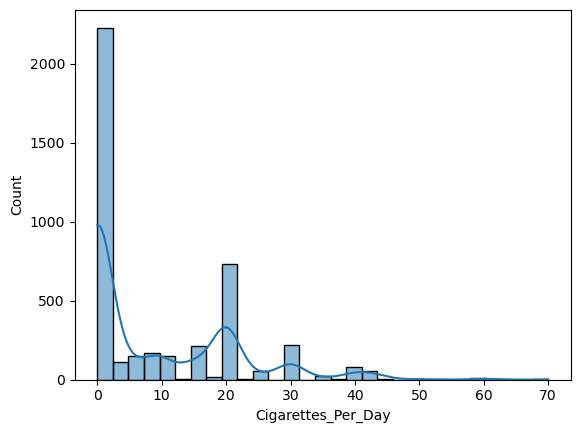

In [52]:
sns.histplot(x="Cigarettes_Per_Day",data=df,kde=True)

<Axes: xlabel='Cigarettes_Per_Day'>

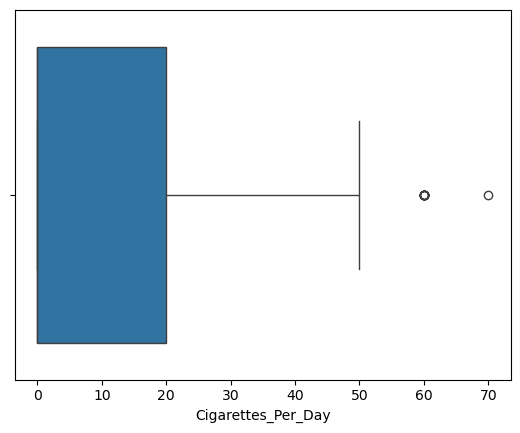

In [53]:
sns.boxplot(x="Cigarettes_Per_Day",data=df)

In [54]:
import numpy as np

In [55]:
def replace_outliers(data,column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+(1.5*IQR)
    lower_bound=Q1-(1.5*IQR)

    data[column]=np.where(data[column]<lower_bound,lower_bound,data[column])
    data[column]=np.where(data[column]>upper_bound,upper_bound,data[column])

    

In [56]:
replace_outliers(df, "Cigarettes_Per_Day")

<Axes: xlabel='Cigarettes_Per_Day'>

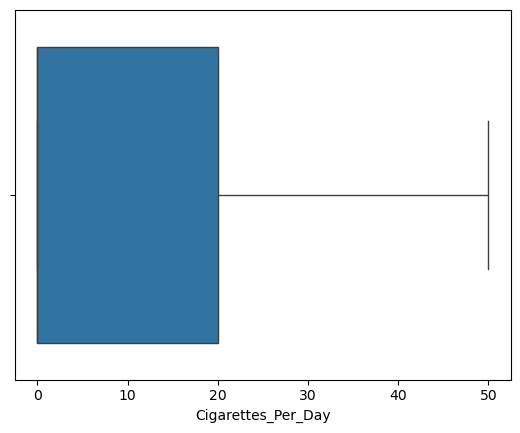

In [57]:
sns.boxplot(x="Cigarettes_Per_Day",data=df)

In [58]:
df["Cigarettes_Per_Day"].describe()

count    4240.000000
mean        8.975236
std        11.760249
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        50.000000
Name: Cigarettes_Per_Day, dtype: float64

Total Cholesterol:

<Axes: xlabel='Total_Cholesterol', ylabel='Count'>

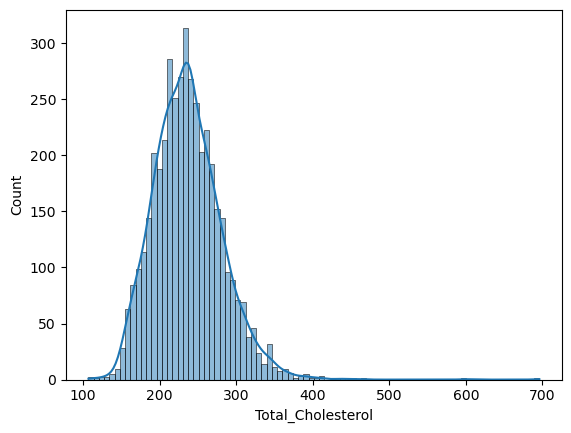

In [59]:
sns.histplot(x="Total_Cholesterol",data=df,kde=True)

<Axes: xlabel='Total_Cholesterol'>

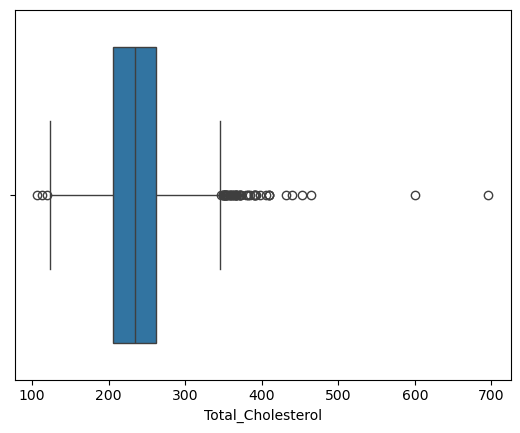

In [60]:
sns.boxplot(x="Total_Cholesterol",data=df)

In [61]:
replace_outliers(df, "Total_Cholesterol")

<Axes: xlabel='Total_Cholesterol'>

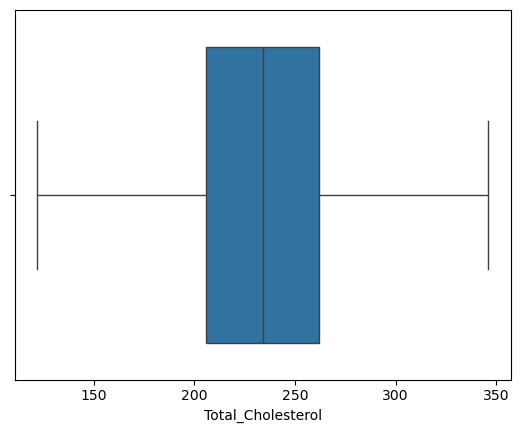

In [62]:
sns.boxplot(x="Total_Cholesterol",data=df)

Systolic BP

<Axes: xlabel='Systolic_BP', ylabel='Count'>

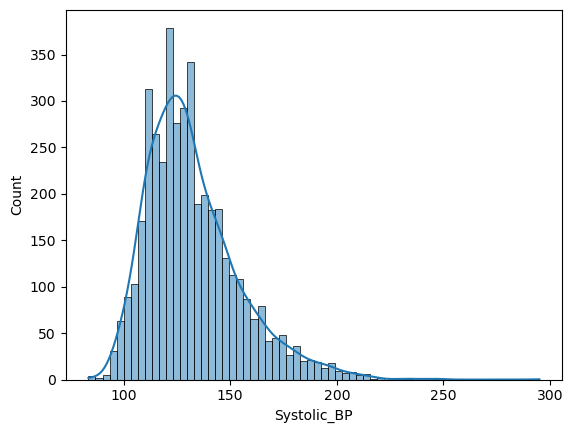

In [63]:
sns.histplot(x="Systolic_BP",data=df,kde=True)

<Axes: xlabel='Systolic_BP'>

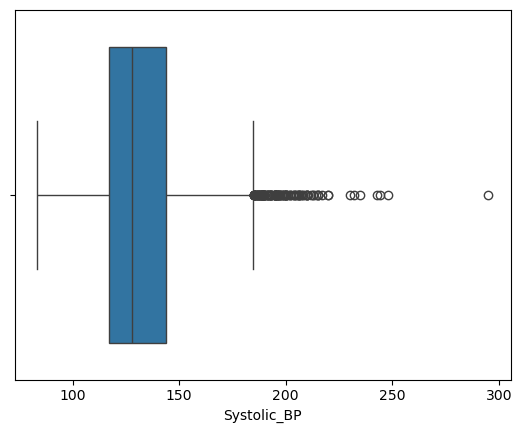

In [64]:
sns.boxplot(x="Systolic_BP",data=df)

In [65]:
replace_outliers(df, "Systolic_BP")

<Axes: xlabel='Systolic_BP'>

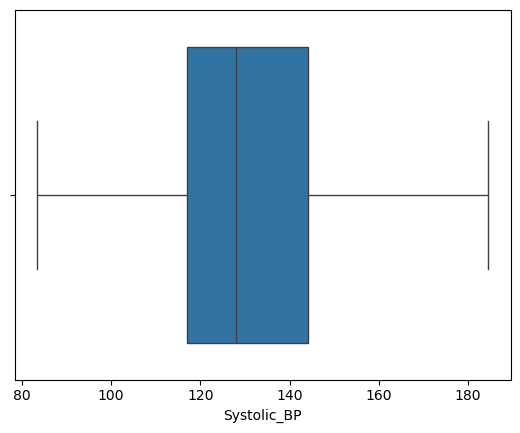

In [66]:
sns.boxplot(x="Systolic_BP",data=df)

Diastolic BP

<Axes: xlabel='Diastolic_BP', ylabel='Count'>

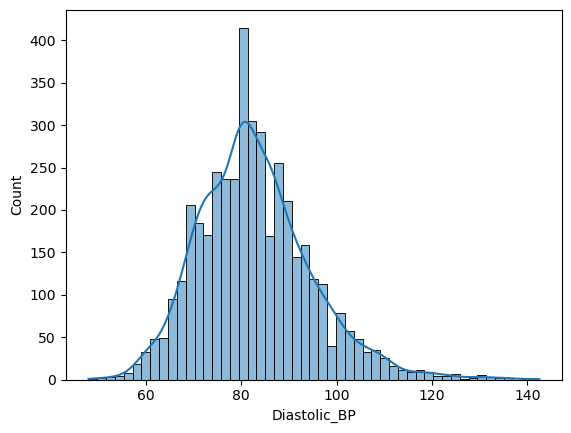

In [67]:
sns.histplot(x="Diastolic_BP",data=df,kde=True)

<Axes: xlabel='Diastolic_BP'>

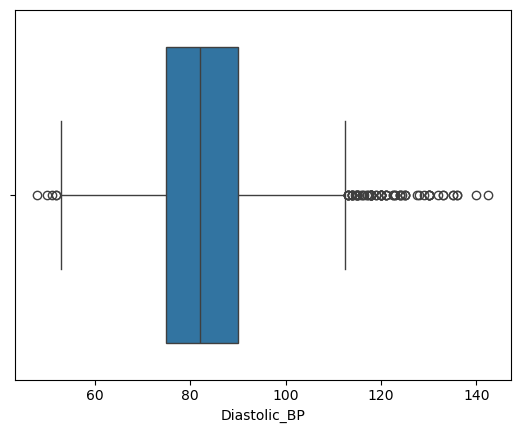

In [68]:
sns.boxplot(x="Diastolic_BP",data=df)

In [69]:
replace_outliers(df, "Diastolic_BP")

<Axes: xlabel='Diastolic_BP'>

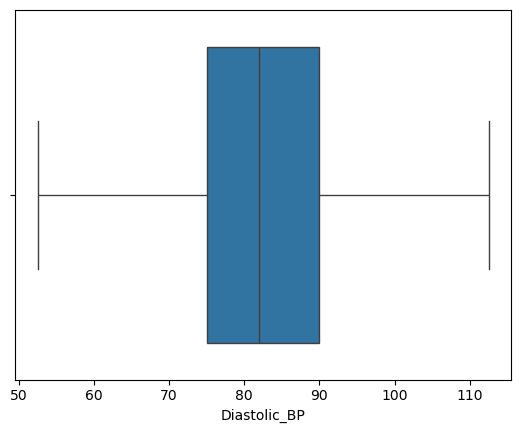

In [70]:
sns.boxplot(x="Diastolic_BP",data=df)

BMI:

<Axes: xlabel='BMI', ylabel='Count'>

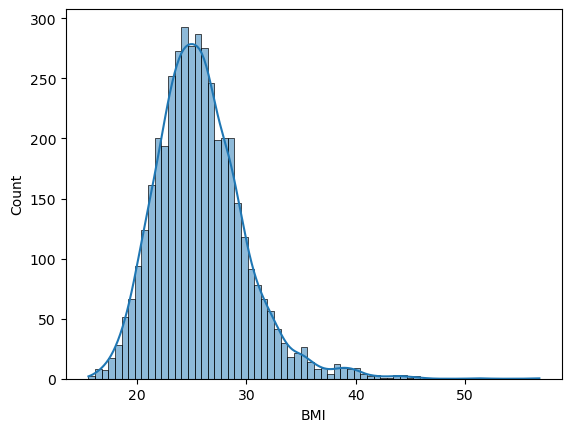

In [71]:
sns.histplot(x="BMI",data=df,kde=True)

<Axes: xlabel='BMI'>

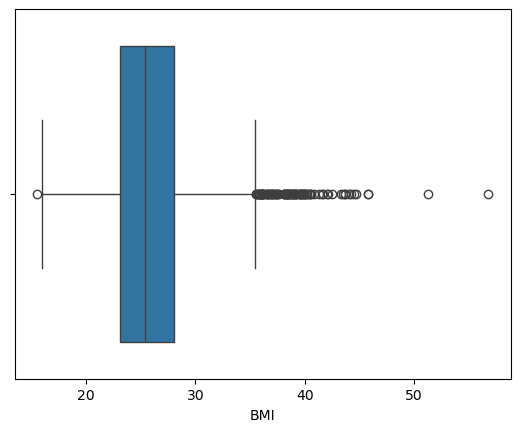

In [72]:
sns.boxplot(x="BMI",data=df)

In [73]:
replace_outliers(df, "BMI")

<Axes: xlabel='BMI'>

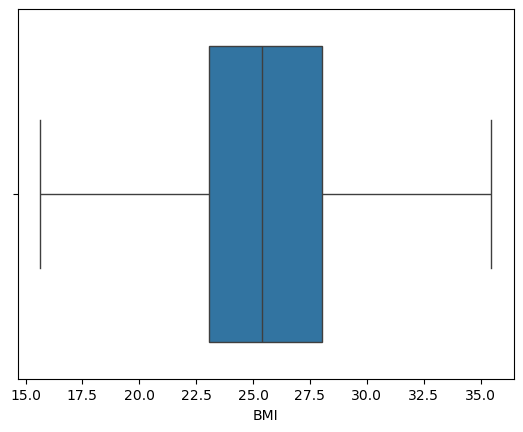

In [74]:
sns.boxplot(x="BMI",data=df)

Heart_Rate

<Axes: xlabel='Heart_Rate', ylabel='Count'>

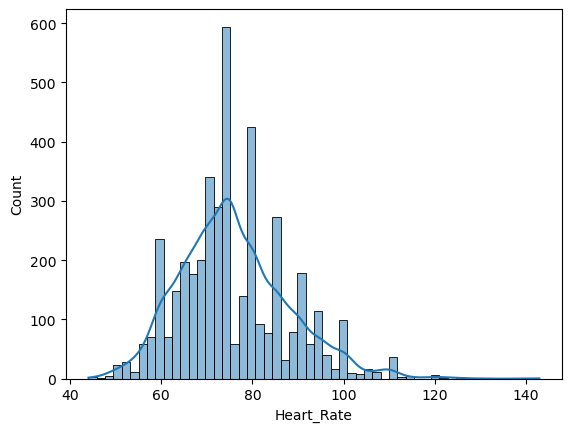

In [75]:
sns.histplot(x="Heart_Rate",data=df,kde=True)

<Axes: xlabel='Heart_Rate'>

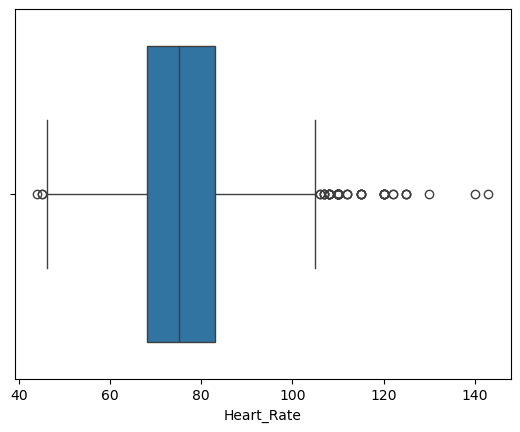

In [76]:
sns.boxplot(x="Heart_Rate",data=df)

In [77]:
replace_outliers(df, "Heart_Rate")

<Axes: xlabel='Heart_Rate'>

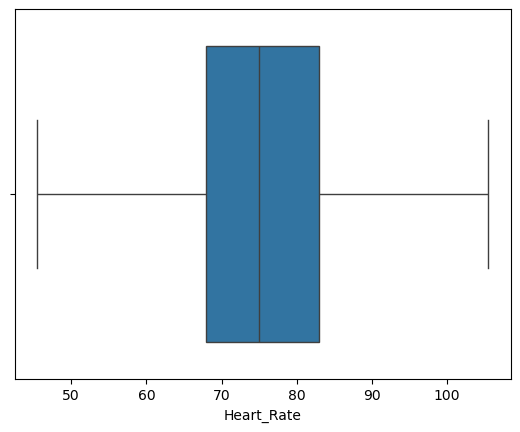

In [78]:
sns.boxplot(x="Heart_Rate",data=df)

Glucose Level:

<Axes: xlabel='Glucose_Level', ylabel='Count'>

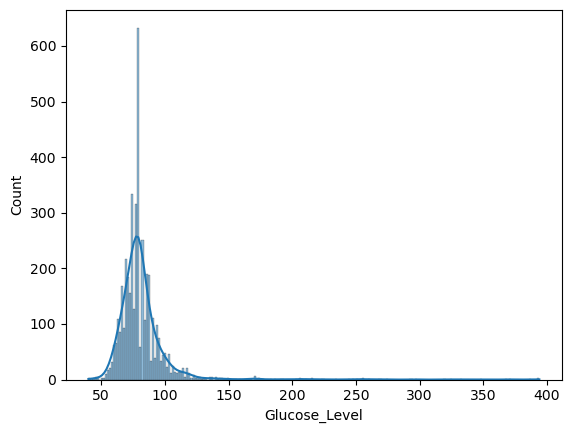

In [79]:
sns.histplot(x="Glucose_Level",data=df,kde=True)

<Axes: xlabel='Glucose_Level'>

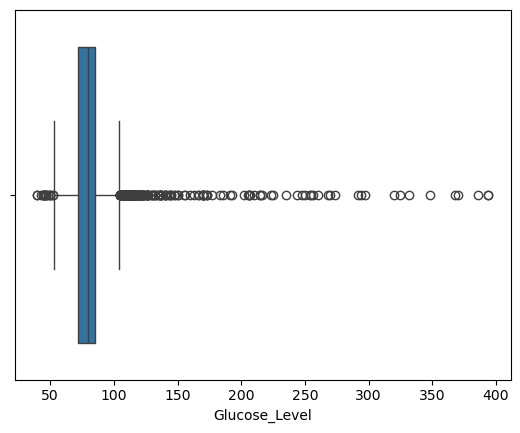

In [80]:
sns.boxplot(x="Glucose_Level",data=df)

In [81]:
replace_outliers(df, "Glucose_Level")

<Axes: xlabel='Glucose_Level'>

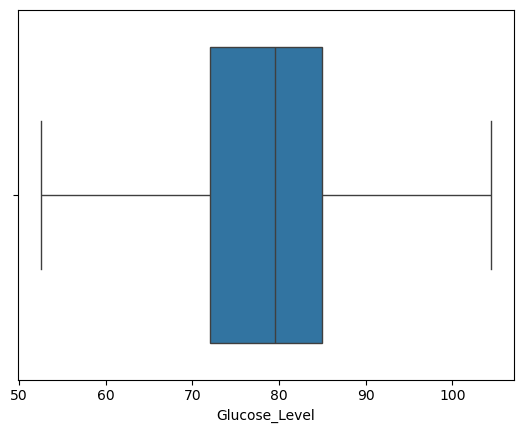

In [82]:
sns.boxplot(x="Glucose_Level",data=df)

In [83]:
df.describe()

,Age,Cigarettes_Per_Day,Total_Cholesterol,Systolic_BP,Diastolic_BP,BMI,Heart_Rate,Glucose_Level
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,8.975236,236.201881,131.915684,82.743042,25.715894,75.750915,79.610143
std,8.572942,11.760249,42.298545,20.642860,11.404757,3.787924,11.622269,11.469480
min,32.000000,0.000000,122.000000,83.500000,52.500000,15.645000,45.500000,52.500000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,79.487000
75%,56.000000,20.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000
max,70.000000,50.000000,346.000000,184.500000,112.500000,35.465000,105.500000,104.500000


                                                       Data Visualizations

In [84]:
import matplotlib.pyplot as plt

In [85]:
import os
os.makedirs("images", exist_ok=True)


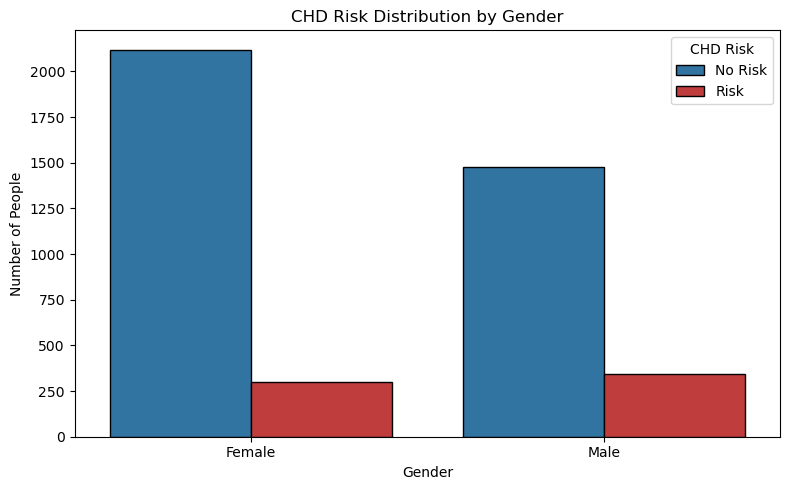

In [86]:
Gender_data = df.groupby(["Gender", "Ten_Year_CHD"]).size().reset_index(name="Count")

plt.figure(figsize=(8, 5))
sns.barplot(data=Gender_data, x="Gender", y="Count", hue="Ten_Year_CHD", palette=["#1f77b4", "#d62728"], edgecolor="black")
plt.title("CHD Risk Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.legend(title="CHD Risk")
plt.tight_layout()
plt.savefig("images/gender_heart_attack.png", dpi=200, bbox_inches="tight")
plt.show()


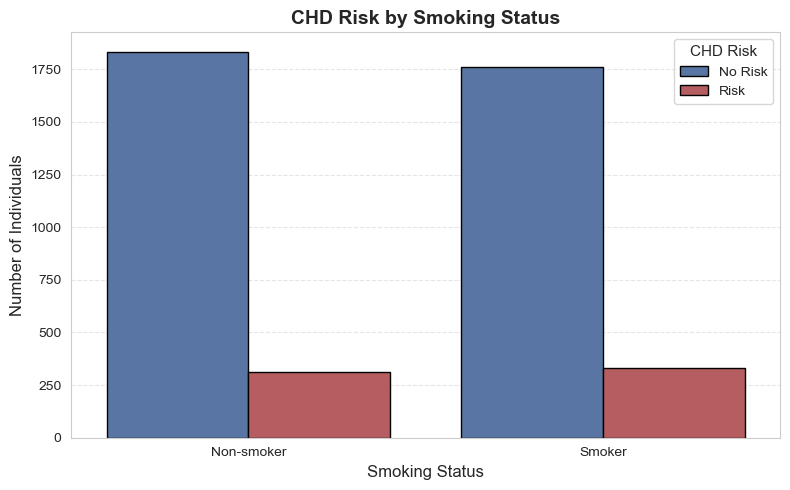

In [87]:
smoke_chd = df.groupby(["Smoking", "Ten_Year_CHD"]).size().reset_index(name="Count")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(data=smoke_chd,x="Smoking",y="Count",hue="Ten_Year_CHD",palette=["#4c72b0", "#c44e52"],edgecolor="black")
plt.title("CHD Risk by Smoking Status", fontsize=14, fontweight="bold")
plt.xlabel("Smoking Status", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="CHD Risk", loc="upper right", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig("images/smoking_heart_attack.png", dpi=200, bbox_inches="tight")
plt.show()

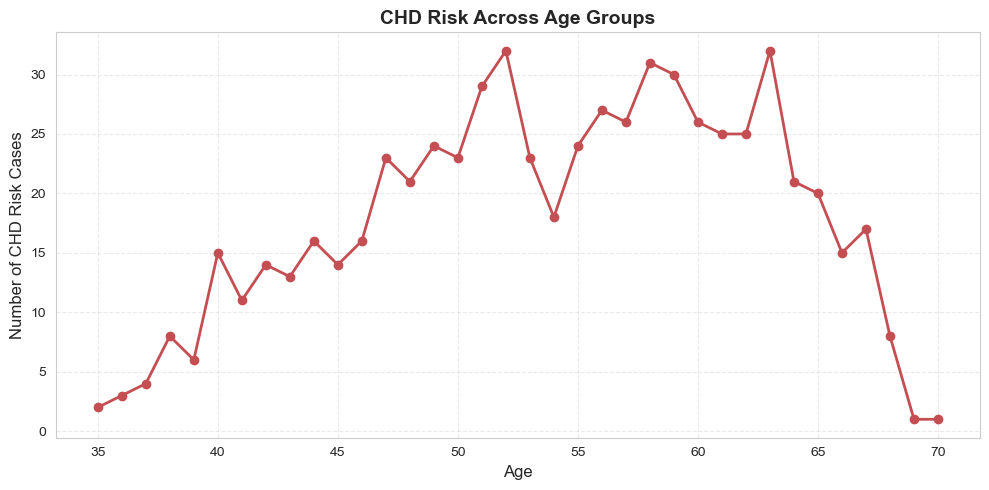

In [88]:
age_chd = df[df["Ten_Year_CHD"] == "Risk"].groupby("Age").size()

plt.figure(figsize=(10, 5))
plt.plot(age_chd.index,age_chd.values,color="#c44e52",marker="o",linestyle="-",linewidth=2)

plt.title("CHD Risk Across Age Groups", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of CHD Risk Cases", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.savefig("images/age_heart_attack.png", dpi=200, bbox_inches="tight")
plt.show()

<Figure size 800x600 with 0 Axes>

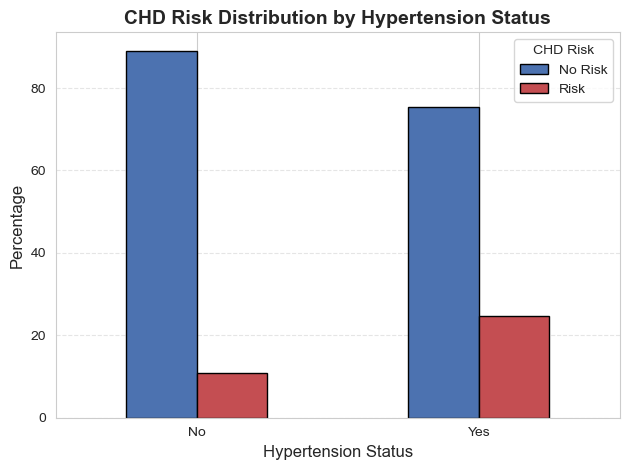

In [89]:
data = df.groupby(["Hypertension", "Ten_Year_CHD"]).size().unstack()
data_percent = data.div(data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
data_percent.plot(kind="bar", stacked=False, color=["#4c72b0", "#c44e52"], edgecolor="black")

plt.title("CHD Risk Distribution by Hypertension Status", fontsize=14, fontweight="bold")
plt.xlabel("Hypertension Status", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend(title="CHD Risk", labels=["No Risk", "Risk"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("images/hypertension_heart_attack.png", dpi=200, bbox_inches="tight")
plt.show()

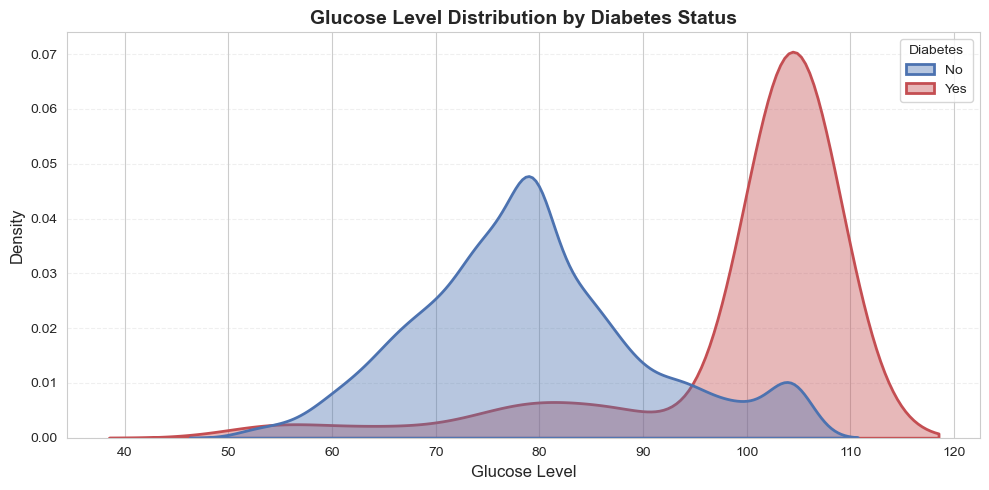

In [90]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="Glucose_Level", hue="Diabetes", fill=True, common_norm=False, palette=["#4c72b0", "#c44e52"], alpha=0.4, linewidth=2)

plt.title("Glucose Level Distribution by Diabetes Status", fontsize=14, fontweight="bold")
plt.xlabel("Glucose Level", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.savefig("images/glucoselevel_heart_attack.png", dpi=200, bbox_inches="tight")
plt.show()

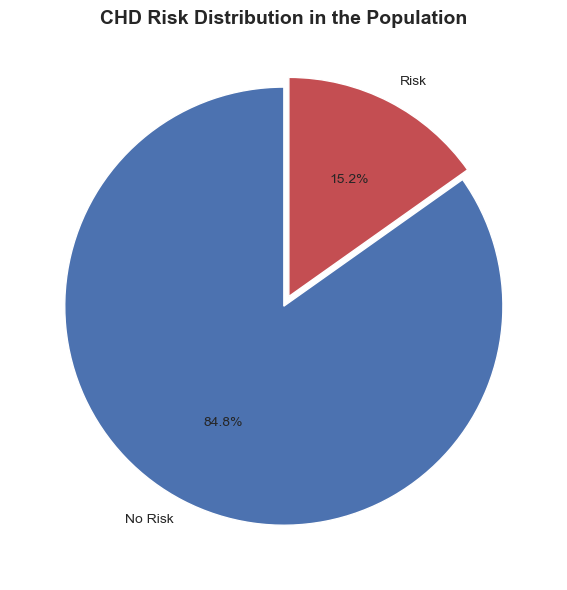

In [91]:
chd_counts = df["Ten_Year_CHD"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(chd_counts.values,labels=chd_counts.index,autopct="%1.1f%%",startangle=90,colors=["#4c72b0", "#c44e52"],explode=(0, 0.05),shadow=False)

plt.title("CHD Risk Distribution in the Population", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("images/population_heart_attack.png", dpi=200, bbox_inches="tight")
plt.show()

                                                               Conclusion & Key Insights

- Lifestyle factors like smoking and high BMI strongly correlate with CHD risk.
- Medical conditions such as hypertension and diabetes are key contributors to elevated CHD probability. 
- Preventive measures focused on reducing cholesterol, controlling blood pressure, and promoting healthier habits can significantly lower long-term heart disease risk. 

This project demonstrates how data analytics can provide meaningful insights into public health risks and guide prevention strategies.
